In [47]:
#import packages 
import pandas as pd 
import numpy as np 

# visulization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 
import  plotly.express as px 
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
from sklearn.preprocessing import  StandardScaler , MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [48]:
data=pd.read_csv("earthquakes.csv")
data.head()

,id,magnitude,type,title,date,time,updated,url,detailUrl,felt,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,us7000necw,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1893,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,tx2024shcj,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,2042,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,ci40734823,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1580,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,tx2024scvz,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,5,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,us7000ndte,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,4,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [49]:
# Dropping 'id', 'url', 'detailUrl', 'types', and 'geometry type' as they do not provide direct information relevant to predicting 'alert' levels. 
# These variables mainly serve as identifiers, text descriptions, or metadata, which don't contribute to the predictive features needed for alert classification.

irrelevant_cols = ['id', 'url', 'detailUrl', 'types', 'geometryType']
data_cleaned = data.drop(columns=irrelevant_cols)
data_cleaned.head()

,magnitude,type,title,date,time,updated,felt,cdi,mmi,alert,...,location,continent,country,subnational,city,locality,postcode,what3words,timezone,locationDetails
0,4.8,earthquake,"M 4.8 - 33 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182289,1726583895255,1893,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79783.0,landmass.perkily.affords,-300,"[{'id': '80684', 'wikidataId': '', 'name': '79..."
1,5.1,earthquake,"M 5.1 - 34 km WSW of Ackerly, Texas",2024-09-17T00:49:42,1726534182183,1726672002991,2042,6,5,green,...,"Ackerly, Texas",North America,United States of America (the),Texas,Tarzan-Lenorah,Tarzan-Lenorah,79331.0,escalator.grownups.dwell,-300,"[{'id': '89341', 'wikidataId': '', 'name': '48..."
2,3.7,earthquake,"M 3.7 - 6 km N of Malibu, CA",2024-09-16T11:22:08,1726485728190,1726637414586,1580,4,4,NaN,...,"Malibu, CA",North America,United States of America (the),California,Los Angeles,Agoura Hills-Malibu,90265.0,clocking.uploaded.issuer,-420,"[{'id': '93478', 'wikidataId': 'Q844837', 'nam..."
3,3.9,earthquake,"M 3.9 - 58 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266539,1726584426218,5,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,sailboats.sawn.speeding,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."
4,4.1,earthquake,"M 4.1 - 60 km S of Whites City, New Mexico",2024-09-14T17:01:06,1726333266382,1726334616179,4,3,4,green,...,"Whites City, New Mexico",North America,United States of America (the),Texas,Van Horn,Van Horn,NaN,spinners.downtime.computes,-300,"[{'id': '9', 'wikidataId': 'Q49', 'name': 'Nor..."


In [50]:
# Select columns with integer data types and convert them to float data type for more precision in calculations
numeric_cols = data_cleaned.select_dtypes(include=['int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].astype(float)

In [51]:
data_cleaned['alert'] = data_cleaned['alert'].astype(str)
print("Unique values in 'alert':", data_cleaned['alert'].unique())

Unique values in 'alert': ['green' 'nan' 'yellow' 'red' 'orange']


In [52]:
# Step 1: Calculate percentiles using the 'magnitude' column from the cleaned data
percentiles = data_cleaned['magnitude'].quantile([0.25, 0.5, 0.75, 0.9]).values

# Step 2: Function to fill NaN values in the 'alert' column based on 'magnitude'
def impute_alert_based_on_magnitude(row):
    if pd.isna(row['alert']):  # Check if 'alert' is NaN
        if row['magnitude'] >= percentiles[3]:  # Top 10% as Red
            return 'red'
        elif row['magnitude'] >= percentiles[2]:  # Top 25% as Orange
            return 'orange'
        elif row['magnitude'] >= percentiles[1]:  # Median as Yellow
            return 'yellow'
        else:
            return 'green'  # Bottom 50% as Green
    else:
        return row['alert']  # Keep existing 'alert' values

# Step 3: Apply the function to fill NaN 'alert' values in the cleaned DataFrame
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Step 4: Check if there are any remaining NaN values in the cleaned data
print("Number of NaN values in 'alert' in data_cleaned:", data_cleaned['alert'].isna().sum())

# Step 5: Remove duplicates in the cleaned data
data_cleaned = data_cleaned.drop_duplicates()


Number of NaN values in 'alert' in data_cleaned: 0


In [53]:
# Replace the string 'nan' with actual NaN values in the cleaned data
data_cleaned['alert'] = data_cleaned['alert'].replace('nan', pd.NA)

# Re-run the imputation logic on the cleaned data
data_cleaned['alert'] = data_cleaned.apply(impute_alert_based_on_magnitude, axis=1)

# Verify that 'nan' strings have been removed and values have been imputed in the cleaned data
print("Updated value counts for 'alert' in data_cleaned:")
print(data_cleaned['alert'].value_counts())


Updated value counts for 'alert' in data_cleaned:
alert
green     760
yellow     30
red         6
orange      4
Name: count, dtype: int64


## Scaling before Encoding process

In [55]:
# Selected Predictors from Analysis:
relevant = ['magnitude', 'rms', 'cdi', 'mmi', 'tsunami', 'location', 'placeOnly', 'city', 'alert']
relevant_df = data_cleaned[relevant]


In [56]:
from sklearn.preprocessing import MinMaxScaler

# Example of selecting numeric columns (make sure they exist in the DataFrame)
columns_to_scale = ['magnitude', 'rms', 'cdi', 'mmi', 'tsunami']

# Check if these columns exist in the DataFrame
missing_columns = [col for col in columns_to_scale if col not in relevant_df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    # Scale the selected columns
    scaler = MinMaxScaler()
    relevant_df[columns_to_scale] = scaler.fit_transform(relevant_df[columns_to_scale])
    print("Scaling applied to selected columns.")

Scaling applied to selected columns.


/var/folders/n8/hhgt1dhs5cjf2b9cydb7_rgr0000gn/T/ipykernel_33767/2711946680.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df[columns_to_scale] = scaler.fit_transform(relevant_df[columns_to_scale])


In [57]:
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,alert
0,0.391304,0.190476,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
1,0.456522,0.039683,0.666667,0.500,0.0,"Ackerly, Texas","WSW of Ackerly, Texas",Tarzan-Lenorah,green
2,0.152174,0.111111,0.444444,0.375,0.0,"Malibu, CA","N of Malibu, CA",Los Angeles,green
3,0.195652,0.039683,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green
4,0.239130,0.103175,0.333333,0.375,0.0,"Whites City, New Mexico","S of Whites City, New Mexico",Van Horn,green


In [58]:
# Feature Scaling numeric variables
relevant_df_num = relevant_df.select_dtypes(include=['int64', 'float64'])
# initializing scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
relevant_df_num_scaled = scaler.fit_transform(relevant_df_num)

relevant_df[relevant_df_num.columns] = relevant_df_num_scaled

/var/folders/n8/hhgt1dhs5cjf2b9cydb7_rgr0000gn/T/ipykernel_33767/3764636370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_df[relevant_df_num.columns] = relevant_df_num_scaled


In [59]:
# Encoding Categorical Data
relevant_df_cat = relevant_df.select_dtypes(include=['object'])
relevant_df_cat.nunique()


location     270
placeOnly    353
city         167
alert          4
dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding using pd.get_dummies
try:
    alert_encoded = pd.get_dummies(relevant_df_cat, columns=['alert'], dtype='int')
    print(alert_encoded)
except Exception as e:
    print("Error during one-hot encoding:", e)

# Label Encoding
try:
    LE = LabelEncoder()
    relevant_df = relevant_df.copy()
    relevant_df['LE_alert'] = LE.fit_transform(relevant_df['alert'])
    print(relevant_df['LE_alert']) 
except Exception as e:
    print("Error during label encoding:", e)

                     location                     placeOnly            city  \
0              Ackerly, Texas         WSW of Ackerly, Texas  Tarzan-Lenorah   
1              Ackerly, Texas         WSW of Ackerly, Texas  Tarzan-Lenorah   
2                  Malibu, CA               N of Malibu, CA     Los Angeles   
3     Whites City, New Mexico  S of Whites City, New Mexico        Van Horn   
4     Whites City, New Mexico  S of Whites City, New Mexico        Van Horn   
...                       ...                           ...             ...   
1124         Bharatpur, Nepal        NE of Bharatpur, Nepal         Gandaki   
1125       Bandar Abbas, Iran     NNW of Bandar Abbas, Iran             Fin   
1126       Bandar Abbas, Iran     NNW of Bandar Abbas, Iran             Fin   
1127       Bandar Abbas, Iran     NNW of Bandar Abbas, Iran             Fin   
1135           Dipayal, Nepal          NE of Dipayal, Nepal    Jayaprithivi   

      alert_green  alert_orange  alert_red  alert_y

In [61]:
pip install --upgrade category_encoders

Note: you may need to restart the kernel to use updated packages.


In [62]:


# Step 1: Convert 'alert' to numeric 
le = LabelEncoder()
relevant_df['alert_encoded'] = le.fit_transform(relevant_df['alert'])  # Replace 'alert' with numeric values
response = relevant_df['alert_encoded']
target = 'alert_encoded'

# List of categorical columns to encode
categorical_cols = ['location', 'placeOnly', 'city']

import category_encoders as ce

# Applying target encoding with smoothing
target_enc = ce.TargetEncoder(cols=categorical_cols, smoothing=0.5)
relevant_df = target_enc.fit_transform(relevant_df, response)
# Drop the 'alert' column
relevant_df.drop(columns=['alert'], inplace=True)

from sklearn.model_selection import train_test_split
# Step 4: Separate features and target variable
X = relevant_df.drop(columns=['alert_encoded'])  # Features
y = relevant_df['alert_encoded']  # Target

# Step 5: Split the data into training and test sets
predictors = [col for col in relevant_df.columns if col != 'alert_encoded']
predictors_df = relevant_df[predictors]
response_df = relevant_df['alert_encoded']


X_train, X_test, y_train, y_test = train_test_split(predictors_df, response_df, test_size = 0.25, random_state=42, stratify=response_df)


## After Scaling and Encdoing Process

In [64]:
relevant_df.head()

,magnitude,rms,cdi,mmi,tsunami,location,placeOnly,city,LE_alert,alert_encoded
0,0.391304,0.190476,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0,0
1,0.456522,0.039683,0.666667,0.500,0.0,0.1325,0.1325,0.1325,0,0
2,0.152174,0.111111,0.444444,0.375,0.0,0.1325,0.1325,0.1325,0,0
3,0.195652,0.039683,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0,0
4,0.239130,0.103175,0.333333,0.375,0.0,0.0000,0.0000,0.0000,0,0


In [65]:
print(X_train.shape)
print(y_train.shape)

(600, 9)
(600,)


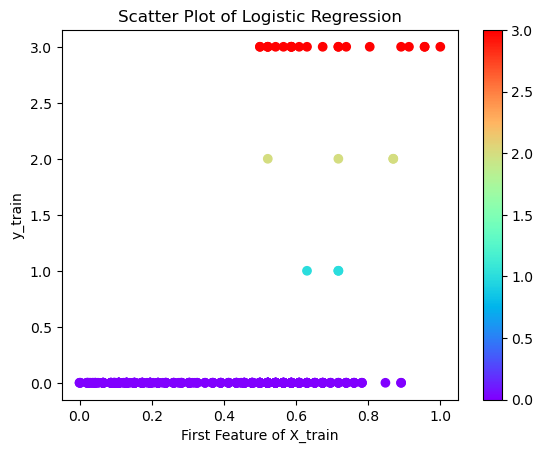

In [66]:
# Showing why we are using Logistic regression as shown how the data is spread
if hasattr(X_train, 'iloc'):  # Check if X_train is a DataFrame
    X_train_feature = X_train.iloc[:, 0]
else:  # Assume X_train is a NumPy array
    X_train_feature = X_train[:, 0]

# Ensure y_train is a 1D array for plotting
y_train = y_train.flatten() if len(y_train.shape) > 1 else y_train

# Create scatter plot
plt.scatter(X_train_feature, y_train, c=y_train, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.xlabel('First Feature of X_train')  # Label for x-axis
plt.ylabel('y_train')  # Label for y-axis
plt.colorbar()  # Show color bar
plt.show()

## Logistic Regression model building with ADAYSN oversampling

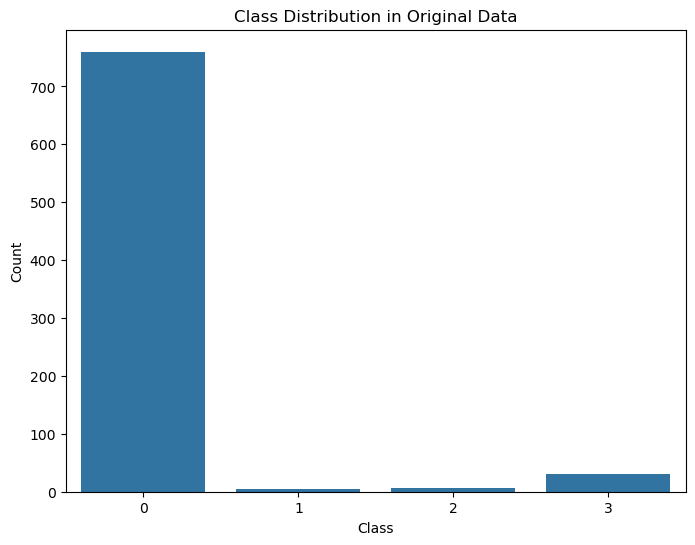

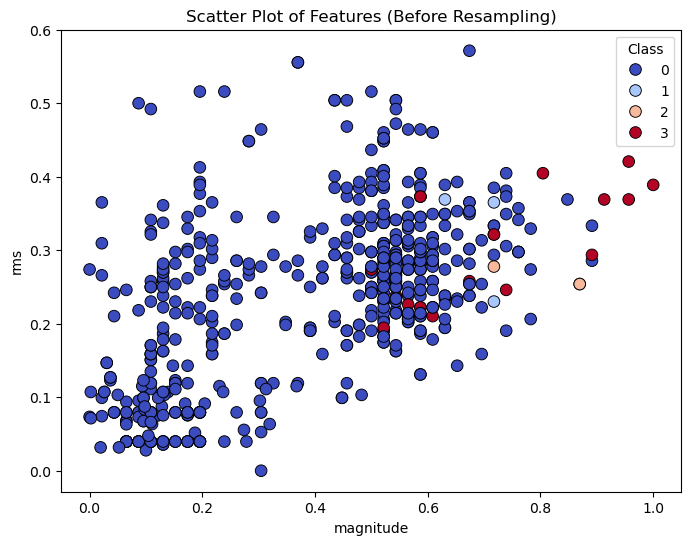

Accuracy on Test Set: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       190
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         7

    accuracy                           0.99       200
   macro avg       0.58      0.75      0.62       200
weighted avg       0.99      0.99      0.99       200

[[190   0   0   0]
 [  0   1   0   0]
 [  0   2   0   0]
 [  0   0   0   7]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


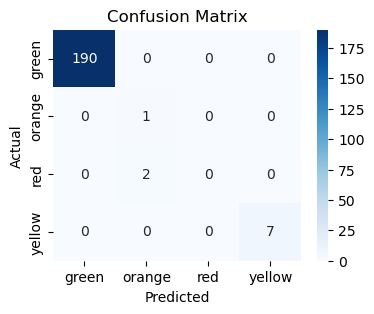

Logistic regression-AUC-ROC Score: 0.9911616161616161


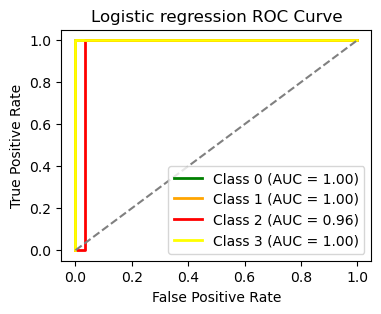

Logistic-regression-AUC-ROC Score: 0.9911616161616161
Balanced Accuracy : 0.75


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, balanced_accuracy_score
from sklearn.preprocessing import label_binarize, StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Step 1: Visualize the initial class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='alert_encoded', data=relevant_df)  # Replace 'alert_encoded' with your actual target column
plt.title('Class Distribution in Original Data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Step 2: Split the data into features and target
X = relevant_df.drop(columns=['alert_encoded'])  # Features
y = relevant_df['alert_encoded']  # Target


# Step 3: Visualizing the features using a scatter plot (using first two features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train.iloc[:, 0], y=X_train.iloc[:, 1], hue=y_train, palette='coolwarm', edgecolor='k', s=70)
plt.title('Scatter Plot of Features (Before Resampling)')
plt.xlabel(X_train.columns[0])
plt.ylabel(X_train.columns[1])
plt.legend(title="Class", loc='upper right')
plt.show()


# step 5: Create a pipeline for oversampling and logistic regression
pipeline = Pipeline([
    ('oversample', ADASYN(n_neighbors=2, random_state=42, sampling_strategy='minority')),  # Fit-resample
    ('log_reg', LogisticRegression())  # Final estimator
])


# Step 6: Fit the model to the training data
pipeline.fit(X_train, y_train)

# Step 7: Predict on the test set
y_pred = pipeline.predict(X_test)


# Accuracy and classification report
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Visualizing the Confusion Matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["green", "orange", "red", "yellow"], yticklabels=["green", "orange", "red", "yellow"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Calculate ROC and AUC for Multi-Class
from sklearn.metrics import roc_auc_score
y_bin = label_binarize(y_test, classes=[0, 1, 2, 3])  # Binarize the labels for multiclass ROC calculation
y_pred_proba = pipeline.predict_proba(X_test)  # Get predicted probabilities
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
print(f"Logistic regression-AUC-ROC Score: {auc_score}")

# Step 10: Calculate ROC curve and AUC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i in range(len([0, 1, 2, 3])):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Step 11: Plot the ROC curve for each class
plt.figure(figsize=(4, 3))
colors = ['green', 'orange', 'red', 'yellow']

for i in range(len([0, 1, 2, 3])):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal (random classifier line)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic regression ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Step 12: AUC-ROC score and Balanced Accuracy Score
print(f"Logistic-regression-AUC-ROC Score: {auc_score}")
balanced_accuracy = balanced_accuracy_score(y_test, y_pred) 
print("Balanced Accuracy :", balanced_accuracy)


## Key Takeaway

Key Takeaways:
Model Performance: The Logistic Regression model performs very well overall with high accuracy. However, performance for classes with very few instances is skewed, especially in terms of precision.

Class Imbalance: The dataset’s class imbalance, particularly for class 1, negatively impacts precision. Techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weighting could improve performance for the underrepresented classes.

Minority Class Handling: The model is highly effective at predicting the majority class (class 0), but its ability to generalize across minority classes could be improved. Further measures, such as oversampling the minority class or tuning the model for class imbalance, could help in addressing this issue.

Model Refinement: The model’s performance could be further optimized by adjusting hyperparameters, using more advanced techniques for handling imbalanced datasets, or by trying ensemble models.

In conclusion, while the model performs well on the whole, addressing the issues related to class imbalance and fine-tuning the model can lead to even better performance across all classes.

## Further improvements that can be made given the small datasize

6. Additional Data Sources:
External Datasets: Look for additional datasets, possibly from related sources like government seismic data, historical earthquake data, or satellite data that could enhance the predictive power of the model.
Geographical Features: If your dataset involves locations (like cities or regions), you could enrich it with geographic features like population density, proximity to tectonic plates, or even weather data.
7. Handling Missing Data:
Imputation: For missing values in features, you can experiment with imputation methods. Use KNN Imputation or Iterative Imputation (which uses a model to predict missing values) instead of simple mean imputation.
Create Missing Indicator Variables: Instead of filling missing values with imputation, sometimes it helps to create an additional binary feature that indicates whether the value was missing or not.
8. Cross-validation:
K-fold Cross-validation: Ensure you use K-fold cross-validation rather than a single train-test split. It will give you a better estimate of model performance and help avoid overfitting.
Stratified Cross-validation: Use StratifiedKFold for cross-validation to ensure that each fold maintains the class distribution.
Nested Cross-validation: If you are tuning hyperparameters, use nested cross-validation to avoid overfitting on the validation data.
9. Hyperparameter Tuning:
Grid Search / Randomized Search: Hyperparameter tuning is essential for optimizing your model’s performance. You can use GridSearchCV or RandomizedSearchCV to tune hyperparameters for models like Logistic Regression, Random Forest, XGBoost, etc.
Bayesian Optimization: For complex models or large hyperparameter spaces, consider using Bayesian optimization or libraries like Optuna for hyperparameter search.
10. Oversampling the data before splitting it into train and test set might yield in better results as well as solve any overfitting issues.  